In [13]:
# libraries
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [14]:
#wine data set
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'

DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("../datasets/winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("../datasets/winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])




In [15]:


# print(f'Data: shape={wine[DL].shape}')
# display("describe",wine[DL].describe())
# display("skew:",wine[DL].skew())
# display("kurtosis", wine[DL].kurtosis())
# display("variance", wine[DL].std())

feature_range = wine[DL].max() - wine[DL].min()
# display("range:")
# display(feature_range)

# sns.histplot(wine['chlorides'], bins=30, kde=True)  
# plt.title("Feature Distribution")
# plt.show()

#removing outliers from high kurtosis features
Q1 = wine['chlorides'].quantile(0.25)
Q3 = wine['chlorides'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
wine = wine[(wine['chlorides'] >= lower_bound) & (wine['chlorides'] <= upper_bound)]
#print(f'Data: shape after removing outliers={wine[DL].shape}')
# display("kurtosis", wine[DL].kurtosis())

# subset = ['total sulfur dioxide', 'free sulfur dioxide', 'residual sugar', 'color']
# sns.pairplot(wine[subset], hue='color')
# plt.title("Pairplot")
# plt.show()

#z-score normalization
scaler = StandardScaler()
wine = wine.astype(float)
wine.iloc[:, :-1] = scaler.fit_transform(wine.iloc[:, :-1])

#display("describe",wine[DL].describe())

X = wine[DC]
y = wine[L]

display(X.head())
display(y.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,-0.143045,-0.396904,0.315855,3.159333,-0.314677,0.806891,0.944287,2.122162,-1.369187,-0.552095,-1.436634,0.0
1,-0.693583,-0.209531,0.173682,-0.817999,-0.098512,-0.952879,0.265185,-0.207206,0.493429,-0.258001,-0.851251,0.0
2,0.722087,-0.334447,0.600202,0.285658,-0.044470,-0.044611,-0.360304,0.158838,0.245080,-0.625618,-0.349494,0.0
3,0.014252,-0.646735,0.031509,0.618838,0.387861,0.920424,1.230225,0.325221,-0.189530,-0.919712,-0.516746,0.0
4,0.014252,-0.646735,0.031509,0.618838,0.387861,0.920424,1.230225,0.325221,-0.189530,-0.919712,-0.516746,0.0


0    0.188674
1    0.188674
2    0.188674
3    0.188674
4    0.188674
Name: quality, dtype: float64

Best k: 6 with RMSE: 0.8878
Variance of RMSE: 0.0001


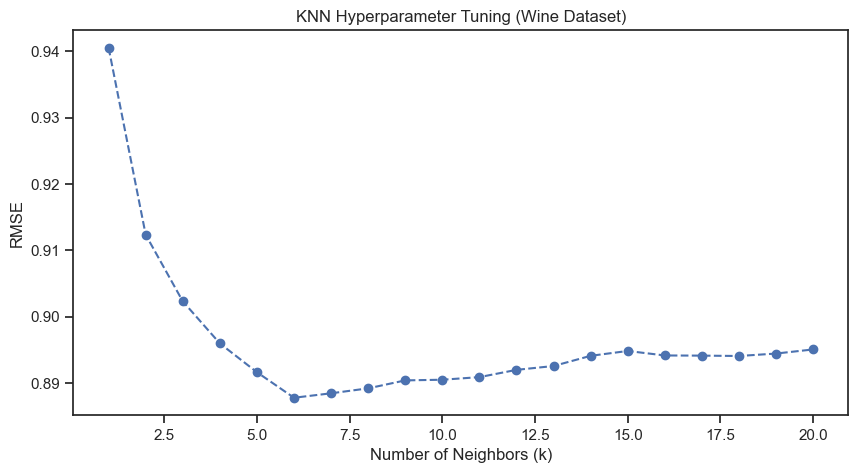

In [20]:
#K Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = wine[DC]  # Features
y = wine[L]   # Target variable

# Initialize 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store RMSE for each fold
rmse_scores = []

# Try different values for n_neighbors to tune KNN
best_k = None
best_rmse = float('inf')

for k in range(1, 21):  # Tuning from k=1 to 20
    fold_rmse = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train KNN Regressor
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Predict and compute RMSE
        y_pred = knn.predict(X_test)
        rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
        fold_rmse.append(rmse)

    avg_rmse = np.mean(fold_rmse)
    rmse_scores.append(avg_rmse)

    # Track best k value
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_k = k

print(f"Best k: {best_k} with RMSE: {best_rmse:.4f}")
print(f"Variance of RMSE: {np.var(rmse_scores):.4f}")

# Plot RMSE scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), rmse_scores, marker='o', linestyle='dashed')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.title('KNN Hyperparameter Tuning (Wine Dataset)')
plt.show()

#best k = 15


Best max_depth: 5 with RMSE: 0.9191
Variance of RMSE: 0.0005


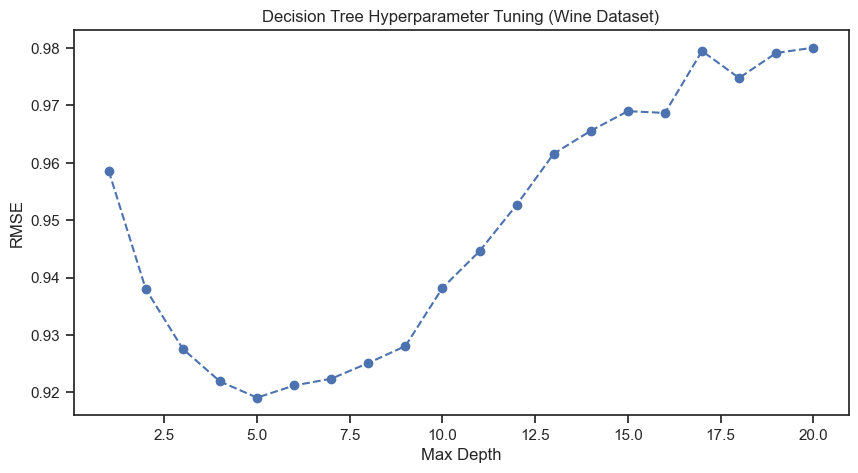

In [21]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Define features (X) and target (y)
X = wine[DC]  # Features
y = wine[L]   # Target variable

# Initialize 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store RMSE for each fold
rmse_scores = []

# Try different values for max_depth to tune DecisionTreeRegressor
best_depth = None
best_rmse = float('inf')
depth_range = range(1, 21)  # Tuning from depth=1 to 20

for depth in depth_range:
    fold_rmse = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train Decision Tree Regressor
        dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
        dt.fit(X_train, y_train)

        # Predict and compute RMSE
        y_pred = dt.predict(X_test)
        rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
        fold_rmse.append(rmse)

    avg_rmse = np.mean(fold_rmse)
    rmse_scores.append(avg_rmse)

    # Track best depth value
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_depth = depth

print(f"Best max_depth: {best_depth} with RMSE: {best_rmse:.4f}")
print(f"Variance of RMSE: {np.var(rmse_scores):.4f}")

# Plot RMSE scores
plt.figure(figsize=(10, 5))
plt.plot(depth_range, rmse_scores, marker='o', linestyle='dashed')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('Decision Tree Hyperparameter Tuning (Wine Dataset)')
plt.show()

#best depth = 5

Python(95253) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Best n_estimators: 300 with RMSE: 0.8289
Variance of RMSE: 0.0001


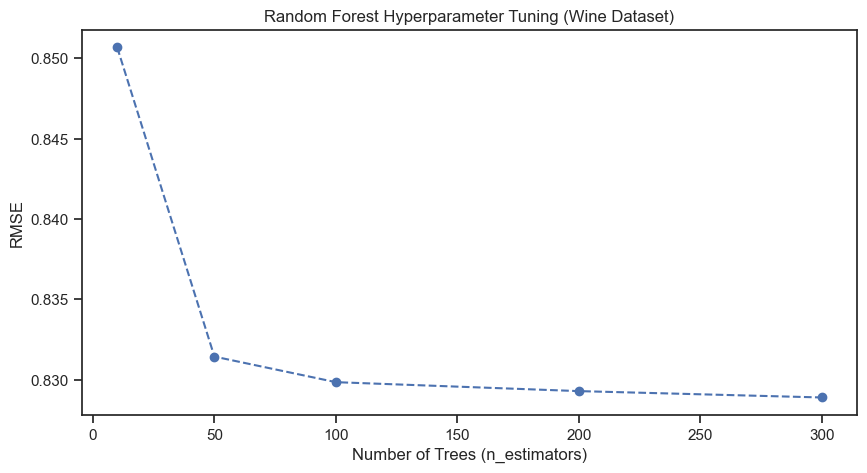

In [22]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and target (y)
X = wine[DC]  # Features
y = wine[L]   # Target variable

# Initialize 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store RMSE for each fold
rmse_scores = []

# Try different values for n_estimators (number of trees) to tune RandomForestRegressor
best_n = None
best_rmse = float('inf')
n_estimators_range = [10, 50, 100, 200, 300]  # Tuning different tree counts

for n in n_estimators_range:
    fold_rmse = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train Random Forest Regressor
        rf = RandomForestRegressor(n_estimators=n, random_state=42, n_jobs=-1)
        rf.fit(X_train, y_train)

        # Predict and compute RMSE
        y_pred = rf.predict(X_test)
        rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
        fold_rmse.append(rmse)

    avg_rmse = np.mean(fold_rmse)
    rmse_scores.append(avg_rmse)

    # Track best n_estimators value
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_n = n

print(f"Best n_estimators: {best_n} with RMSE: {best_rmse:.4f}")
print(f"Variance of RMSE: {np.var(rmse_scores):.4f}")

# Plot RMSE scores
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, rmse_scores, marker='o', linestyle='dashed')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('RMSE')
plt.title('Random Forest Hyperparameter Tuning (Wine Dataset)')
plt.show()

#best n_estimators = 200


Best n_estimators: 300 with RMSE: 0.8714
Variance of RMSE: 0.0005


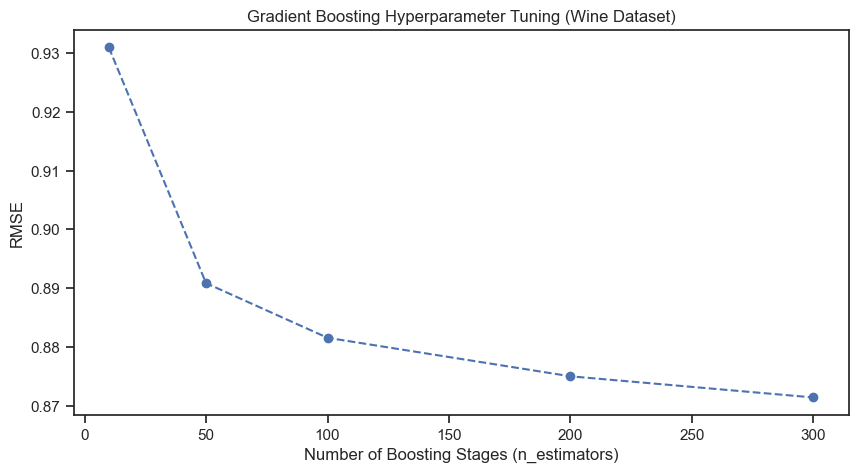

In [23]:
#Gradient Tree Boosted Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Define features (X) and target (y)
X = wine[DC]  # Features
y = wine[L]   # Target variable

# Initialize 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store RMSE for each fold
rmse_scores = []

# Try different values for n_estimators (number of boosting stages) to tune GradientBoostingRegressor
best_n = None
best_rmse = float('inf')
n_estimators_range = [10, 50, 100, 200, 300]  # Tuning different boosting stages

for n in n_estimators_range:
    fold_rmse = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train Gradient Boosting Regressor
        gbr = GradientBoostingRegressor(n_estimators=n, random_state=42)
        gbr.fit(X_train, y_train)

        # Predict and compute RMSE
        y_pred = gbr.predict(X_test)
        rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
        fold_rmse.append(rmse)

    avg_rmse = np.mean(fold_rmse)
    rmse_scores.append(avg_rmse)

    # Track best n_estimators value
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_n = n

print(f"Best n_estimators: {best_n} with RMSE: {best_rmse:.4f}")
print(f"Variance of RMSE: {np.var(rmse_scores):.4f}")

# Plot RMSE scores
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, rmse_scores, marker='o', linestyle='dashed')
plt.xlabel('Number of Boosting Stages (n_estimators)')
plt.ylabel('RMSE')
plt.title('Gradient Boosting Hyperparameter Tuning (Wine Dataset)')
plt.show()

#best n_estimators = 200


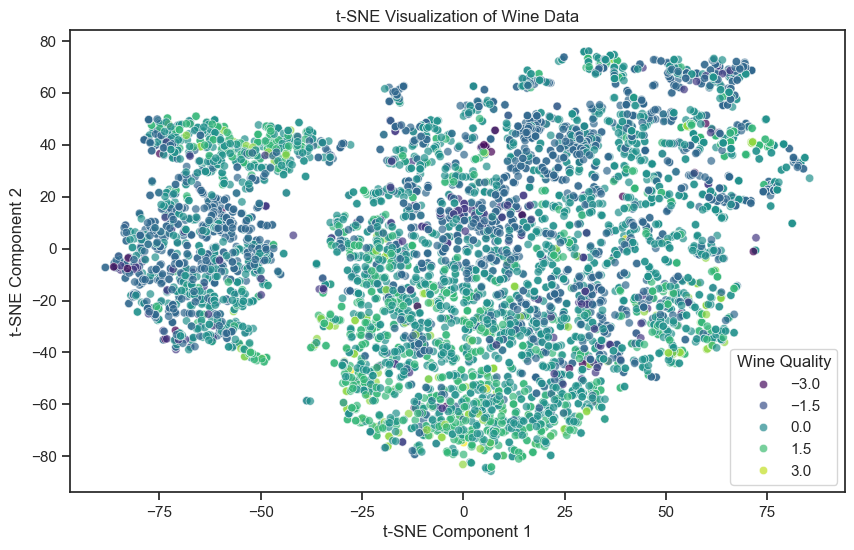

In [ ]:
#Representation Learning 

#use t=SNE to visualize the datrasets with 2D plot
from sklearn.manifold import TSNE

# Run t-SNE to reduce dataset to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Adjust perplexity if needed
X_tsne = tsne.fit_transform(X)

# Convert to DataFrame for plotting
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
y = y.reset_index(drop=True) 
tsne_df['Quality'] = y  # Add target labels for color coding

# Plot t-SNE visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue=tsne_df['Quality'], palette='viridis', alpha=0.7, data=tsne_df)
plt.title("t-SNE Visualization of Wine Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Wine Quality")
plt.show()





Explained Variance by PC1: 0.2977
Explained Variance by PC2: 0.2316
Total Explained Variance (PC1 + PC2): 0.5293


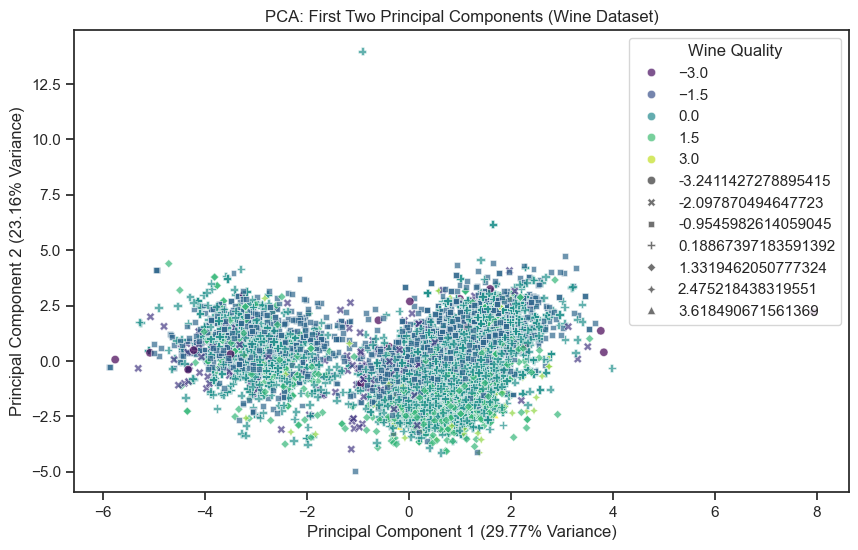

In [24]:
#3.2 PCA
from sklearn.decomposition import PCA

#Run PCA on each dataset and look at total variance expalined by the principal components 
pca = PCA(n_components=2)  # Reduce to 2D
X_pca = pca.fit_transform(X)

# Convert to DataFrame for easier plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Quality'] = y.reset_index(drop=True)  # Ensure matching index

# Print variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PC1: {explained_variance[0]:.4f}")
print(f"Explained Variance by PC2: {explained_variance[1]:.4f}")
print(f"Total Explained Variance (PC1 + PC2): {np.sum(explained_variance):.4f}")

# Create PCA scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=pca_df['Quality'], palette='viridis', style=pca_df['Quality'], markers=True, data=pca_df, alpha=0.7)
plt.title("PCA: First Two Principal Components (Wine Dataset)")
plt.xlabel(f"Principal Component 1 ({explained_variance[0]*100:.2f}% Variance)")
plt.ylabel(f"Principal Component 2 ({explained_variance[1]*100:.2f}% Variance)")
plt.legend(title="Wine Quality")
plt.show()

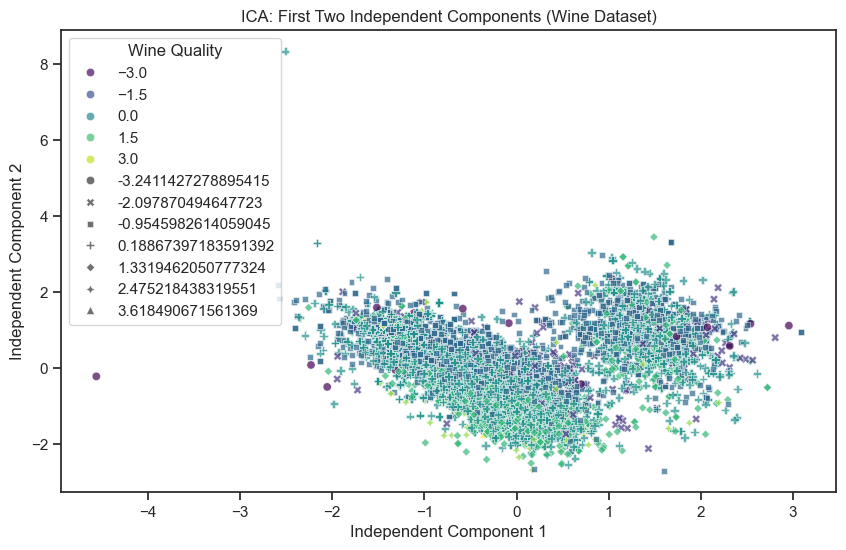

In [25]:
#3.3 ICA
from sklearn.decomposition import FastICA

# Run ICA to extract independent components
ica = FastICA(n_components=2, random_state=42)  # Reduce to 2 components
X_ica = ica.fit_transform(X)

# Convert to DataFrame for easier plotting
ica_df = pd.DataFrame(X_ica, columns=['IC1', 'IC2'])
ica_df['Quality'] = y.reset_index(drop=True)  # Ensure matching index

# Create ICA scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IC1', y='IC2', hue=ica_df['Quality'], palette='viridis', style=ica_df['Quality'], markers=True, data=ica_df, alpha=0.7)
plt.title("ICA: First Two Independent Components (Wine Dataset)")
plt.xlabel("Independent Component 1")
plt.ylabel("Independent Component 2")
plt.legend(title="Wine Quality")
plt.show()


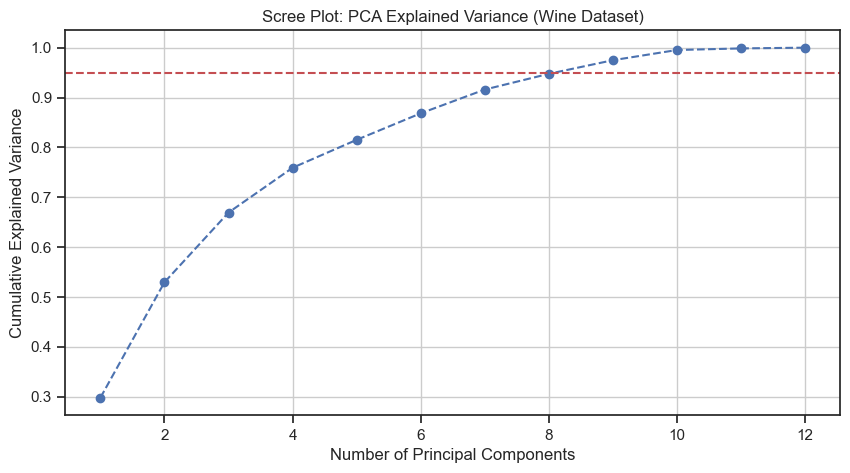

Optimal number of PCA components: 9


In [26]:
#3.4 Creaet scree-plot and 2 new datasets with reduced dimensionality

# Step 1: Compute PCA on full dataset
pca = PCA()
X_pca_full = pca.fit_transform(X)

# Step 2: Scree plot - variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--')  # Mark 95% variance line
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot: PCA Explained Variance (Wine Dataset)')
plt.grid()
plt.show()

# Step 3: Determine the best reduced dimension size (where cumulative variance ~95%)
best_pca_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of PCA components: {best_pca_components}")

# Step 4: Create reduced datasets
pca = PCA(n_components=best_pca_components)
X_pca = pca.fit_transform(X)
wine_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(best_pca_components)])
wine_pca['Quality'] = y.reset_index(drop=True)

# Step 5: ICA - Use the same number of components as PCA for fair comparison
ica = FastICA(n_components=best_pca_components, random_state=42)
X_ica = ica.fit_transform(X)
wine_ica = pd.DataFrame(X_ica, columns=[f'IC{i+1}' for i in range(best_pca_components)])
wine_ica['Quality'] = y.reset_index(drop=True)

# Save the datasets to CSV files for future testing
wine_pca.to_csv("../datasets/wine-pca.csv", index=False)
wine_ica.to_csv("../datasets/wine-ica.csv", index=False)



In [19]:
#3.5 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
# Load datasets
X_pca = pd.read_csv("../datasets/wine-pca.csv", header=0).iloc[:, :-1]  # Exclude target column
X_ica = pd.read_csv("../datasets/wine-ica.csv", header=0).iloc[:, :-1]  # Exclude target column

datasets = {
    "wine": X,  # Features only
    "wine-pca": X_pca,  # PCA-transformed dataset
    "wine-ica": X_ica  # ICA-transformed dataset
}

# Define models with best hyperparameters
models = {
    "k-NN": KNeighborsRegressor(n_neighbors=15),  # Best k from tuning
    "RF": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),  # Example best params
    "GB": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)  # Example best params
}

# Initialize 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

# Iterate over each dataset and model combination
for dataset_name, X in datasets.items():
    for model_name, model in models.items():
        fold_rmse = []
        
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
            fold_rmse.append(rmse)
        
        avg_rmse = np.mean(fold_rmse)
        results.append([dataset_name, model_name, avg_rmse])

# Convert results to DataFrame and display
results_df = pd.DataFrame(results, columns=["Dataset", "Model", "RMSE"])
display(results_df)

,Dataset,Model,RMSE
0,wine,k-NN,0.894814
1,wine,RF,0.858805
2,wine,GB,0.867518
3,wine-pca,k-NN,0.894050
4,wine-pca,RF,0.862329
5,wine-pca,GB,0.872228
6,wine-ica,k-NN,0.899473
7,wine-ica,RF,0.861542
8,wine-ica,GB,0.872335
